<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

# Importing the libraries

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [266]:
import io
from google.colab import files

In [267]:
uploaded = files.upload()

Saving CLASSIFICATION.csv to CLASSIFICATION (8).csv


In [268]:
dataset = pd.read_csv(io.BytesIO(uploaded['CLASSIFICATION.csv']))

In [269]:
dataset

,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220_1,SH1_B5_Diameter -0.220_2,SH1_B5_Diameter -0.160_1,SH1_B5_Diameter -0.160_2,SH1_B5_Position -0.005_1,SH1_B5_Position -0.005_2,SH1_B1_Width -0.190,SH1_B1_Distance -0.200,SH1_B1_Position- 0.002,...,SH2_A8_Diameter -0.650_1,SH2_A8_Diameter -0.650_2,SH2_A8_Diameter -0.650_3,SH2_A8_True Position -0.003_1,SH2_A8_True Position -0.003_2,SH2_A8_True Position -0.003_3,SH5 A8_SURFACE FINISH_1,SH5 A4_SURFACE FINISH_2,SH1 B5_DEPTH .100,QUALITY
0,14.017,0.222,0.222,0.161,0.161,0.001,0.001,0.192,0.199,0.0,...,0.652,0.652,0.652,0.001,0.001,0.001,7.0,7.0,0.101,1
1,14.016,0.221,0.222,0.161,0.161,0.000,0.001,0.192,0.201,0.0,...,0.652,0.652,0.652,0.002,0.001,0.001,7.0,7.0,0.101,1
2,14.016,0.222,0.222,0.161,0.161,0.001,0.001,0.192,0.200,0.0,...,0.652,0.652,0.652,0.001,0.001,0.001,7.0,7.0,0.101,0
3,14.018,0.222,0.222,0.161,0.161,0.000,0.001,0.192,0.200,0.0,...,0.652,0.652,0.652,0.002,0.001,0.001,7.0,7.0,0.101,0
4,14.016,0.222,0.222,0.161,0.161,0.000,0.001,0.192,0.200,0.0,...,0.652,0.652,0.652,0.001,0.001,0.001,11.0,8.0,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,14.016,0.221,0.221,0.160,0.160,0.002,0.001,0.192,0.199,0.0,...,0.652,0.652,0.652,0.001,0.000,0.001,7.0,7.0,0.102,0
407,14.018,0.221,0.221,0.160,0.160,0.001,0.001,0.191,0.200,0.0,...,0.652,0.652,0.652,0.002,0.001,0.001,7.0,7.0,0.102,1
408,14.018,0.221,0.221,0.160,0.160,0.000,0.001,0.192,0.200,0.0,...,0.652,0.652,0.652,0.002,0.001,0.001,7.0,7.0,0.103,1
409,14.018,0.221,0.221,0.160,0.160,0.000,0.001,0.192,0.200,0.0,...,0.652,0.652,0.652,0.002,0.001,0.001,7.0,7.0,0.101,1


In [270]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,42:43].values

In [271]:
print(X)

[[14.017  0.222  0.222 ...  7.     7.     0.101]
 [14.016  0.221  0.222 ...  7.     7.     0.101]
 [14.016  0.222  0.222 ...  7.     7.     0.101]
 ...
 [14.018  0.221  0.221 ...  7.     7.     0.103]
 [14.018  0.221  0.221 ...  7.     7.     0.101]
 [14.017  0.221  0.221 ...  7.     7.     0.102]]


In [272]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


In [273]:
dataset.shape

(411, 43)

In [274]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SH1_C2_Diameter -14.020        411 non-null    float64
 1   SH1_B5_Diameter -0.220_1       411 non-null    float64
 2   SH1_B5_Diameter -0.220_2       411 non-null    float64
 3   SH1_B5_Diameter -0.160_1       411 non-null    float64
 4   SH1_B5_Diameter -0.160_2       411 non-null    float64
 5   SH1_B5_Position -0.005_1       411 non-null    float64
 6   SH1_B5_Position -0.005_2       411 non-null    float64
 7   SH1_B1_Width -0.190            411 non-null    float64
 8   SH1_B1_Distance -0.200         411 non-null    float64
 9   SH1_B1_Position- 0.002         411 non-null    float64
 10  SH1_D5_Position -0.005_1       411 non-null    float64
 11  SH1_D5_Position -0.005_2       411 non-null    float64
 12  SH1_D5_Position -0.005_3       411 non-null    flo

# Taking care of missing data

Impute Missing Values. 

In [275]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [276]:
print(X)

[[14.017  0.222  0.222 ...  7.     7.     0.101]
 [14.016  0.221  0.222 ...  7.     7.     0.101]
 [14.016  0.222  0.222 ...  7.     7.     0.101]
 ...
 [14.018  0.221  0.221 ...  7.     7.     0.103]
 [14.018  0.221  0.221 ...  7.     7.     0.101]
 [14.017  0.221  0.221 ...  7.     7.     0.102]]


In [277]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


Check the percentage of missing values in each variable.

In [278]:
dataset.isnull().sum()/len(dataset)*100

SH1_C2_Diameter -14.020          0.0
SH1_B5_Diameter -0.220_1         0.0
SH1_B5_Diameter -0.220_2         0.0
SH1_B5_Diameter -0.160_1         0.0
SH1_B5_Diameter -0.160_2         0.0
SH1_B5_Position -0.005_1         0.0
SH1_B5_Position -0.005_2         0.0
SH1_B1_Width -0.190              0.0
SH1_B1_Distance -0.200           0.0
SH1_B1_Position- 0.002           0.0
SH1_D5_Position -0.005_1         0.0
SH1_D5_Position -0.005_2         0.0
SH1_D5_Position -0.005_3         0.0
SH1_D5_Position -0.005_4         0.0
SH2_D7_Width -0.190              0.0
SH2_D7_Distance -0.20            0.0
SH2_D7_Position- 0.002           0.0
SH2_B1_Position -0.005_1         0.0
SH2_B1_Position -0.005_2         0.0
SH2_B1_Position -0.005_3         0.0
SH2_B1_Position -0.005_4         0.0
SH2_B1_Position -0.005_5         0.0
SH2_B1_Position -0.005_6         0.0
SH2_B1_Position -0.005_7         0.0
SH2_B1_Position -0.005_8         0.0
SH2_B1_Position -0.015_1         0.0
SH2_B1_Position -0.015_2         0.0
S

# Splitting the dataset into the Training set and Test set

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [280]:
print(X_train)

[[14.016  0.221  0.221 ...  7.     7.     0.1  ]
 [14.018  0.221  0.221 ...  7.     7.     0.101]
 [14.016  0.221  0.221 ...  7.     8.     0.1  ]
 ...
 [14.019  0.221  0.222 ...  9.     9.     0.101]
 [14.017  0.222  0.222 ...  9.     8.     0.101]
 [14.017  0.221  0.221 ...  8.     8.     0.101]]


In [281]:
print(X_test)

[[14.016  0.221  0.221 ...  7.     8.     0.101]
 [14.017  0.222  0.222 ...  7.     7.     0.1  ]
 [14.016  0.221  0.222 ...  6.     6.     0.101]
 ...
 [14.017  0.221  0.222 ...  6.     6.     0.101]
 [14.017  0.222  0.222 ... 14.    15.     0.101]
 [14.017  0.222  0.222 ...  9.    14.     0.101]]


In [282]:
print(Y_train)

[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]


In [283]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Feature Scaling

In [284]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [285]:
print(X_train)

[[-0.70585489 -0.65263001 -1.06025371 ... -0.30374673 -0.28354183
  -1.57605516]
 [ 0.96647824 -0.65263001 -1.06025371 ... -0.30374673 -0.28354183
  -0.08243981]
 [-0.70585489 -0.65263001 -1.06025371 ... -0.30374673  0.3447379
  -1.57605516]
 ...
 [ 1.80264481 -0.65263001  0.94317048 ...  1.05210825  0.97301763
  -0.08243981]
 [ 0.13031167  1.53226176  0.94317048 ...  1.05210825  0.3447379
  -0.08243981]
 [ 0.13031167 -0.65263001 -1.06025371 ...  0.37418076  0.3447379
  -0.08243981]]


In [286]:
print(X_test)

[[-0.70585489 -0.65263001 -1.06025371 ... -0.30374673  0.3447379
  -0.08243981]
 [ 0.13031167  1.53226176  0.94317048 ... -0.30374673 -0.28354183
  -1.57605516]
 [-0.70585489 -0.65263001  0.94317048 ... -0.98167422 -0.91182156
  -0.08243981]
 ...
 [ 0.13031167 -0.65263001  0.94317048 ... -0.98167422 -0.91182156
  -0.08243981]
 [ 0.13031167  1.53226176  0.94317048 ...  4.4417457   4.74269601
  -0.08243981]
 [ 0.13031167  1.53226176  0.94317048 ...  1.05210825  4.11441628
  -0.08243981]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [287]:
dataset.var()

SH1_C2_Diameter -14.020          1.372025e-06
SH1_B5_Diameter -0.220_1         2.167824e-07
SH1_B5_Diameter -0.220_2         2.476055e-07
SH1_B5_Diameter -0.160_1         8.211976e-08
SH1_B5_Diameter -0.160_2         7.197199e-08
SH1_B5_Position -0.005_1         3.758353e-07
SH1_B5_Position -0.005_2         3.719186e-07
SH1_B1_Width -0.190              2.487924e-07
SH1_B1_Distance -0.200           6.125809e-07
SH1_B1_Position- 0.002           2.668091e-08
SH1_D5_Position -0.005_1         4.084861e-07
SH1_D5_Position -0.005_2         4.333986e-07
SH1_D5_Position -0.005_3         2.122960e-07
SH1_D5_Position -0.005_4         2.858228e-07
SH2_D7_Width -0.190              2.505964e-07
SH2_D7_Distance -0.20            5.010148e-07
SH2_D7_Position- 0.002           1.272577e-06
SH2_B1_Position -0.005_1         7.471011e-07
SH2_B1_Position -0.005_2         6.839594e-07
SH2_B1_Position -0.005_3         7.516468e-07
SH2_B1_Position -0.005_4         6.810041e-07
SH2_B1_Position -0.005_5         5

# Training the K-NN model on the Training set

In [288]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# Predicting the Test set results

In [289]:
Y_pred = knn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# Making the Confusion Matrix

In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[87  1]
 [ 6  9]]


0.9320388349514563

In [291]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.7200000000000001

In [292]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred)

0.598252427184466

In [293]:
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred)

0.9

In [294]:
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred)

0.6

In [295]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.7943181818181819

In [296]:
from sklearn.metrics import zero_one_loss
zero_one_loss(Y_test, Y_pred)

0.06796116504854366

In [297]:
from sklearn.metrics import roc_curve
roc_curve(Y_test, Y_pred)

(array([0.        , 0.01136364, 1.        ]),
 array([0. , 0.6, 1. ]),
 array([2, 1, 0]))

# Prediction Probability Data Matrices

In [298]:
r_probs = [0 for _ in range(len(Y_test))] ##Worst case scenario
knn_probs = knn.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [299]:
knn_probs = knn_probs[:, 1]

# Computing AUROC and ROC curve values

In [300]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUROC

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [301]:
r_auc = roc_auc_score(Y_test, r_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)

# Print AUROC scores

In [302]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('K-NN Classifier: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
K-NN Classifier: AUROC = 0.933


# Calculate ROC curve

In [304]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

# Plot the ROC curve

In [305]:
import matplotlib.pyplot as plt

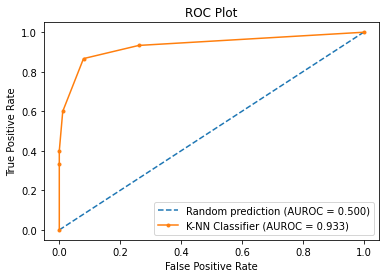

In [306]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-NN Classifier (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()